# TP8: Equations non-linéaires

On s'intéresse à trouver une solution à l'équation non linéaire $f(x) = 0.$ Dans ce TP, nous verrons trois méthodes pour y parvenir: 
- La méthode de la bissection
- La méthode des points fixes
- La méthode de Newton


## Exercice 1: Méthode de la bissection

Dans le programme télévisé "Le juste prix", le jeu final consiste à deviner le prix d'une enveloppe cadeau en moins de 25 secondes. Le candidat doit proposer un prix, le présentateur répond par "c'est plus" ou "c'est moins", puis le candidat propose un nouveau prix, etc. 

Quelle approche utiliser pour être le plus rapide ? La méthode de la bissection!

La méthode de la bissection, aussi appelée méthode de dichotomie, consiste à choisir successivement des points pour approcher un zéro d'une fonction, sur un intervalle donné. On peut la résumer ainsi:

1. Commencer avec l'intervalle $[a, b]$ de sorte que $f(a)f(b) < 0$
2. Définir $m = \frac{b-a}{2}$.
   1. Si $f(a)f(m) < 0$ alors on continue avec l'intervalle $[a, m]$.
   2. Si $f(b)f(m) < 0$ alors on continue avec l'intervalle $[m, b]$.
   3. Si $f(m) = 0$, on a terminé.

En pratique, on impose un nombre maximal d'itération, et on donne une tolérance au-delà de laquelle le résultat est numériquement satisfaisant.


### Exercice 1.0 : Réflexion 

Formuler le problème du jeu "Le juste prix" sous la forme du problème du type: trouver $x$ tel que $f(x) = 0$. 

On peut modéliser le jeu "Le juste prix" par une droite affine tel que 
$$f(x) = \left\{
    \begin{array}{ll}
        0 & \: si \: x=valeur \:recherchée \\
        \lt 0 & \: si \: x \lt valeur \:recherchée \\
        \gt 0 & \: si \: x \gt valeur \:recherchée
    \end{array}
\right.

### Exercice 1.1 : Implémentation de la méthode de la bissection

1. Programmer la méthode de la bissection.

In [1]:
import numpy as np
def Bissection(f, a, b, max_iter, tol):
    """Méthode de la bissection pour trouver une racine d'une fonction f
    La méthode s'arrête si le nombre d'itérations max_iter est atteint ou
    si la valeur absolue de f(x) est inférieure à tol.
    
    Entrées
    -------
    f : callable
        Fonction dont on cherche une racine
    a : float
        borne inférieure de l'intervalle
    b : float
        borne supérieure de l'intervalle
    max_iter : int
        nombre maximal d'itérations
    tol : float
        tolérance pour la convergence

    Sorties
    -------
    xk : list
        liste des valeurs de x à chaque itération
    """
    # Vérification des entrées
    if a >= b:
        raise ValueError("a doit être inférieur à b")
    if f(a) * f(b) > 0:
        raise ValueError("f(a) et f(b) doivent avoir des signes opposés")
    # VOTRE CODE ICI
    def divide(a, b):
        return (b+a)/2
    
    def solve (a, b, f):
        if (f(a) * f(b) > 0):
            return False
        else:
            return True
        
    def combine(a, b, c, f):
        if (solve(a, c, f)):
            return a, c
        elif (solve(c, b, f)):
            return c, b

    for i in np.arange(max_iter):
        c = divide(a, b)
        a, b = combine(a, b, c, f)
        if (a == 0):
            print("Ce point est un point où f(x) = 0 !")
            return a
        elif (b == 0):
            print("Ce point est un point où f(x) = 0 !")
            return b
        elif (np.absolute(b+a) <= tol):
            # Ici j'aurai aussi pu retourner b...
            return a, b
    # Ici j'aurai aussi pu retourner b...
    return a, b

    

### Exercice 1.2: Convergence de la méthode de la bissection

Considérons les fonction $$f_1(x) = x^2 - 3x - 4, \quad f_2(x) = (x+1) (x+5)^3 (x-5)^5.$$

Posons $a = -3.8$ et $b=0.5$.

1. D'après le cours, combien d'iterations faut-il, au minimum, pour atteindre une tolérance de $\epsilon = 10^{-10}$ ?

2. Testez votre code sur $f_1$ et $f_2$. Observez-vous la condition théorique?

1. On a:
$$\frac{b-a}{2^{n}} \leq \epsilon
\Leftrightarrow \frac{b-a}{\epsilon} \leq 2^{n}
\Leftrightarrow log_{2}(\frac{b-a}{\epsilon}) \leq n
$$
Donc pour atteindre une tolérance de $\epsilon = 10 ^ {-10}$, il faudra un nombre d'itérations minimum de 35:
$$log_{2}(\frac{0.5 + 3.8}{10^{-10}}) \leq n
\Leftrightarrow n \geq 35$$

In [2]:
np.log2((0.5 + 3.8)/(10**-10))

35.32361760868836

In [3]:
## Paramètres
a = -3.8
b = 0.5
max_iter = 50
tol = 1e-10

# Première fonction
f1 = lambda x: x**2 - 3*x - 4
# VOTRE CODE ICI
print(Bissection(f1, a, b, max_iter, tol))


# Deuxième fonction
f2 = lambda x: (x+1) * (x+5)**3 * (x-5)**5
# VOTRE CODE ICI
print(Bissection(f2, a, b, max_iter, tol))



(-1.0000000000000027, -0.9999999999999989)
(-1.0000000000000027, -0.9999999999999989)


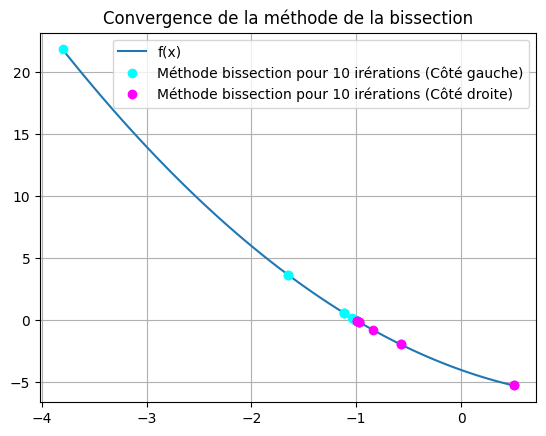

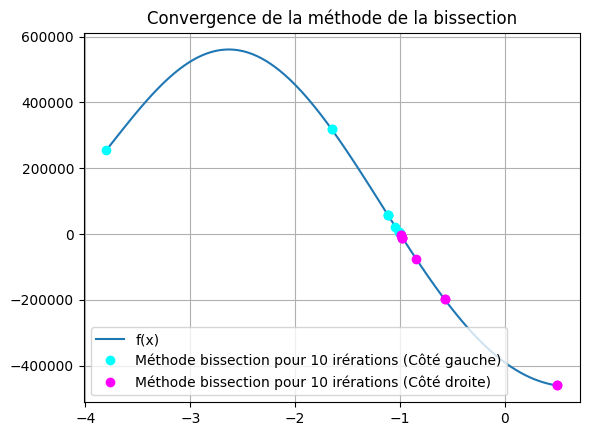

In [4]:
# Figure de la convergence de la méthode de la bissection
import matplotlib.pyplot as plt
# VOTRE CODE ICI
def graphe_convergence(f, a, b, max_iter, tol):
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    for i in range(max_iter):
        w, z = Bissection(f, a, b, i, tol)
        x_1.append(w)
        y_1.append(f(w))
        x_2.append(z)
        y_2.append(f(z))
    x_f = np.linspace(a, b, 100)
    y_f = []
    for i in np.arange(100):
        y_f.append(f(x_f[i]))
    plt.plot(x_f, y_f, label = 'f(x)')
    plt.plot(x_1, y_1, 'o', color= 'cyan', label = "Méthode bissection pour " + str(max_iter) + " irérations (Côté gauche)")
    plt.plot(x_2, y_2, 'o', color= 'magenta', label = "Méthode bissection pour " + str(max_iter) + " irérations (Côté droite)")
    plt.title("Convergence de la méthode de la bissection")
    plt.grid(True)
    plt.legend()
    plt.show()

graphe_convergence(f1, a, b, 10, tol)
graphe_convergence(f2, a, b, 10, tol)




3. Quel est l'ordre de cette méthode ?

*Votre réponse ici*
Je ne sais pas...


## Exercice 2. Méthode des points fixes

On aimerait résoudre une équation non-linéaire de la forme 
$$\phi(\pmb{x}) = \pmb{x},$$
pour une certaine fonction $\phi : \mathbb R^n \rightarrow \mathbb R^n$. 

La méthode des points fixes consiste à itérer
$$\pmb{x}^{(k+1)} = \phi(\pmb{x}^{(k)}),$$
jusqu'à ce que la différence entre deux itérations soit plus petite qu'une certaine tolérance, ou bien qu'un nombre maximum d'itération soit atteint.


### Exercice 2.1: Implémentation de la méthode des points fixes

Implémentez une fonction `point_fixe` qui applique la méthode décrite ci-dessus. 

Indication: Vous pouvez utiliser la fonction `np.linalg.norm` pour calculer la différence entre deux itérations.

In [5]:
def point_fixe(phi, x0, max_iter, tol):
    """Itération du point fixe.
    La méthode s'arrête lorsque le nombre maximal d'itération est atteint,
    ou bien lorsque la différence entre deux itérations est plus petite que la tolérance donnée.
    Retourne une liste contenant les valeurs de x à chaque itération.

    Entrées
    -------
    phi: callable
        Fonction de l'itération du point fixe
    x0: float
        Valeur initiale
    max_iter: int
        Nombre maximal d'itérations
    tol: float
        Tolérance pour la convergence

    Sorties
    -------
    xk: list
        Liste des valeurs de x à chaque itération
    """

    # VOTRE CODE ICI
    xk = []
    xk.append(x0)
    x = x0
    for i in range(max_iter):
        x = phi(x)
        xk.append(x)
        if (np.linalg.norm(xk[-1] - 0) < tol):
                print("Différence entre 2 itérations plus petite que la tolérance donnée !")
                return xk
    return xk


In [6]:
# Tests automatiques
## Test avec une fonction scalaire
phi = lambda x: x - np.sin(x)
x0 = 0.5
max_iter = 100
tol = 1e-10
xk = point_fixe(phi, x0, max_iter, tol)
assert isinstance(xk, list), "La méthode du point fixe doit retourner une liste"
assert isinstance(xk[0], float), "La méthode du point fixe doit retourner une liste de scalaires"
assert np.linalg.norm(xk[-1] - 0) < tol, "La méthode du point fixe n'a pas convergé pour une fonction scalaire"


## Test avec une fonction vectorielle
phi = lambda x: np.array([x[0] - np.sin(x[0]), x[1] - np.cos(x[1])])
x0 = np.array([0.5, 0.5])
max_iter = 100
tol = 1e-10
xk = point_fixe(phi, x0, max_iter, tol)
assert isinstance(xk, list), "La méthode du point fixe doit retourner une liste"
assert isinstance(xk[0], np.ndarray), "La méthode du point fixe doit retourner une liste de vecteurs"
assert np.linalg.norm(xk[-1] - np.array([0, -np.pi/2])) < tol, "La méthode du point fixe n'a pas convergé pour une fonction vectorielle"

print("Tests réussis")

Différence entre 2 itérations plus petite que la tolérance donnée !
Tests réussis


### Exercice 2.2: Convergence de la méthode des points fixes

Le but de cet exercice est de reproduire les exemples du cours. 

Pour rappel, si l'on souhaite trouver les racines d'une fonction $f : \mathbb R \rightarrow \mathbb R$, on peut utiliser la méthode des points fixes en posant 
$$\phi(x) = x - \alpha f(x), \quad \text{ avec } \alpha \neq 0.$$ 

Plus généralement pour une fonction $f : \mathbb R^n \rightarrow \mathbb R^n$, on peut poser 
$$\phi(\pmb{x}) = \pmb{x} - B f(\pmb{x}),$$ 
où $B \in \mathbb R^{n\times n}$ est une matrice **inversible**.



#### Rôle de $\alpha$

La solution exacte de l'équation $\cos(x) = 0$ est $x=\frac{\pi}{2}$. Comme expliqué ci-dessus, on peut estimer cette valeur en définissant 
$$\phi(x) = x + \alpha \cos(x), \quad \alpha \neq 0.$$

Pour différentes valeurs de $\alpha$, tracez la convergence de la méthode des points fixes. Dans le cours, nous avions choisi $\alpha_1 = 1, \alpha_2 = 0.5, \alpha_3 = 10$ et $x_0 = 1$.

Qu'observez-vous ?

**Indication:** Pour tracer la convergence, vous pouvez utiliser la fonction `plt.semilogy` qui trace un graphe en échelle logarithmique. (Pourquoi utiliser une échelle logarithmique ?)

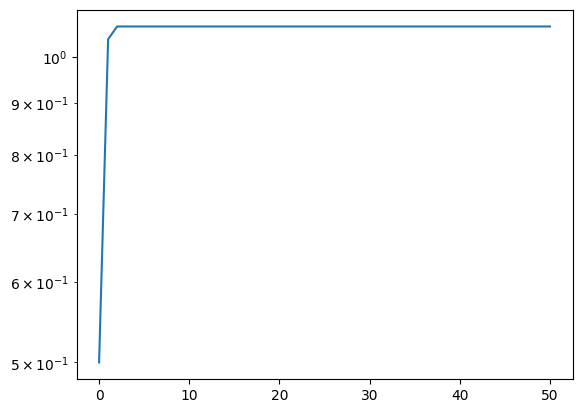

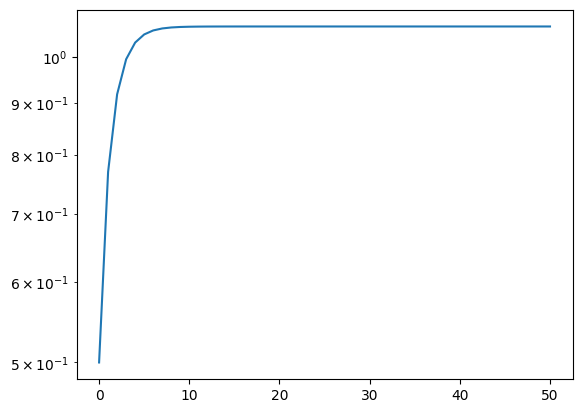

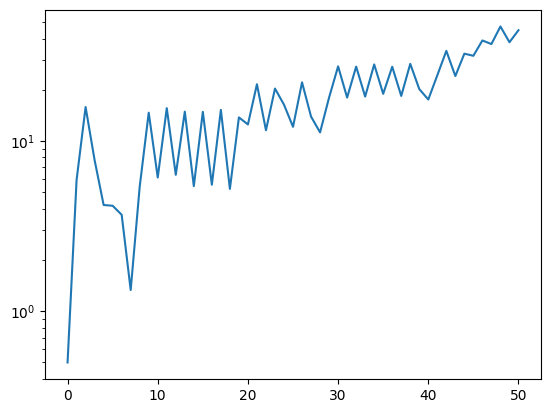

In [7]:
x_ref = np.pi/2
x0 = 1
max_iter = 50
tol = 1e-12

# VOTRE CODE ICI
import math
phi_1 = lambda x : x + math.cos(x)
phi_2 = lambda x: x + 0.5 * math.cos(x)
phi_3 = lambda x: x + 10 * math.cos(x)
xk_1 = point_fixe(phi_1, x0, max_iter, tol)
result_1 = []
for i in range(len(xk_1)):
    result_1.append(np.linalg.norm(xk_1[i] - 1/2))
xk_2 = point_fixe(phi_2, x0, max_iter, tol)
result_2 = []
for i in range(len(xk_2)):
    result_2.append(np.linalg.norm(xk_2[i] - 1/2))
xk_3 = point_fixe(phi_3, x0, max_iter, tol)
result_3 = []
for i in range(len(xk_3)):
    result_3.append(np.linalg.norm(xk_3[i] - 1/2))
plt.semilogy(result_1)
plt.show()
plt.semilogy(result_2)
plt.show()
plt.semilogy(result_3)
plt.show()



*Votre observation ici*



#### Une infinité de possibilités

Bien que le choix de poser $\phi(x) = x - \alpha f(x)$ avec $\alpha \neq 0$ soit naturel, ce n'est pas le seul choix possible.

En fait, il y a une infinité de choix possibles. Par exemple, on voit facilement que
$$\phi(x) = x \iff \phi(x) + x \delta(x) = x + x \delta(x) \quad \overset{\delta(x) \neq -1}{\iff} \quad \frac{\phi(x) + \delta(x)}{1 + \delta(x)} = x \iff \tilde{\phi}(x) = x.$$

Bien que cette modification semble triviale, le choix de $\delta(x)$ peut changer l'ordre de convergence de la méthode.

On cherche à résoudre l'équation $x e^x = 1$.

On a, par exemple, les deux possibilités suivantes:
1. On écrit $x = e^{-x},$ d'où $\phi_1(x) = e^{-x}$.
2. On écrit $x e^x + x = 1 + x$ d'où $\phi_2(x) = \frac{1 + x}{e^x + 1}$.

Pour chaque choix, tracez la convergence de la méthode des points fixes. Qu'observez-vous ?


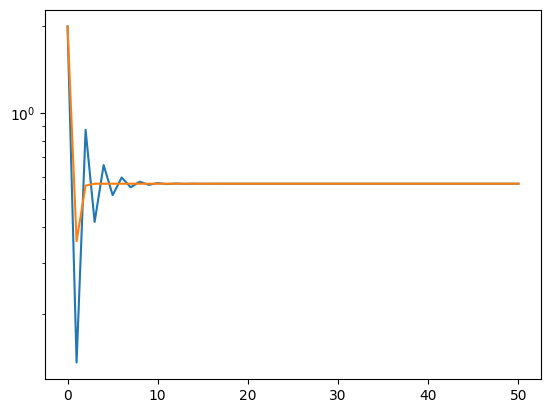

In [9]:
# Paramètres
x0 = 2
max_iter = 50
tol = 1e-12
import scipy
x_ref = scipy.optimize.newton(lambda x: x*np.exp(x) - 1, 1)

# Première fonction
phi1 = lambda x: np.exp(-x)
# VOTRE CODE ICI
plt.semilogy(point_fixe(phi1, x0, max_iter, tol))


# Deuxième fonction
phi2 = lambda x: (1+x) / (np.exp(x) + 1)
# VOTRE CODE ICI
plt.semilogy(point_fixe(phi2, x0, max_iter, tol))

# Plot
# VOTRE CODE ICI


*Votre observation ici*
La deuxième fonction converge plus rapidement


### Exercice 2.3: Application à la résolution de systèmes linéaires

Lorsque l'on cherche à résoudre un système linéaire $A \pmb{x} = \pmb{b}$ de manière exacte, la méthode la plus efficace est d'utiliser la factorisation LU, ou bien la décomposition QR comme nous l'avons vu dans les précédents TPs.

Cependant, lorsque le système est très large, ces décompositions peuvent être trop coûteuses.
Souvent une approximation moins coûteuse de la solution est suffisante. Ce genre d'approximations peuvent être obtenues avec des méthodes itératives, comme la méthode du point fixe.

Dans le code ci-dessous, on implémente une fonction `point_fixe_solve` qui résout le système linéaire $A \pmb{x} = \pmb{b}$ en itérant

$$\pmb{x}^{(k+1)} = \pmb{x}^{(k)} - \alpha (A \pmb{x}^{(k)} - \pmb{b}), \quad \alpha \neq 0.$$


#### 

In [10]:
def point_fixe_solve(A, b, x0, alpha, max_iter, tol):
    """Résolution d'un système linéaire par la méthode du point fixe
    
    Entrées
    -------
    A : ndarray
        Matrice du système linéaire
    b : ndarray
        Vecteur du système linéaire
    x0 : ndarray
        Valeur initiale de x
    alpha : float
        Paramètre de la méthode du point fixe
    max_iter : int
        Nombre maximal d'itérations
    tol : float
        Tolérance pour la convergence

    Sorties
    -------
    x : ndarray
        Solution du système linéaire
    all_x : list (optionnel)
        Liste des valeurs de x à chaque itération
    """
    # Initialisation
    x = x0
    all_x = [x]
    # Boucle
    for k in np.arange(max_iter):
        x1 = x - alpha * (A.dot(x) - b)
        all_x.append(x1)
        if np.linalg.norm(x1 - x) < tol:
            break
        x = x1
    # Vérification de la convergence
    # if k == max_iter - 1:
    #     print("La méthode du point fixe n'a pas convergé.")

    return x1, all_x

Considérons le système $A \pmb{x} = \pmb{b}$ d'ordre $n$, avec une matrice $A \in \mathbb R^{n \times n}$ symétrique, dont le spectre est inclus dans $[ \lambda_{\min}, \lambda_{\max} ]$. 

Pour plusieurs valeurs de $\alpha \in [-0.1, 0.1]$, on affiche l'historique de convergence de la méthode en traçant l'erreur relative 
$$\frac{|| \pmb{x}_k - \pmb{x}^* ||_2}{||\pmb{x}_0 - \pmb{x}^*||_2}, \quad k = 0, 1, 2, \ldots, k_{\max}.$$

Pour quelle valeur de $\alpha$ la convergence est-elle la plus rapide ? La convergence (en échelle logarithmique) est-elle linéaire ou quadratique ?

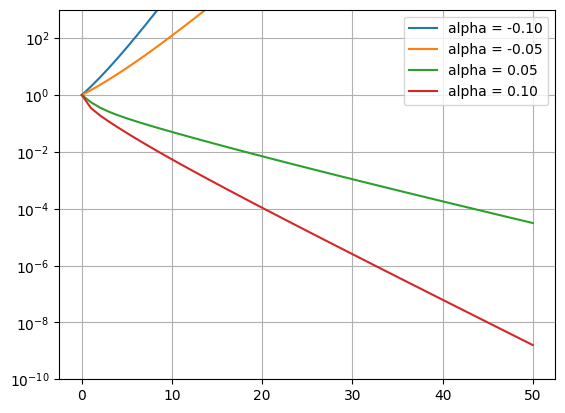

In [11]:
# Génération du système
n = 100
lambda_min = 3
lambda_max = 17
np.random.seed(1234)
U, _ = np.linalg.qr(np.random.rand(n, n))
d = lambda_min + (lambda_max-lambda_min) * np.random.rand(n)
A = U.dot(np.diag(d)).dot(U.T)
x = 2 * np.random.rand(n) - 1
b = A.dot(x)

# Paramètres
all_alpha = np.linspace(-0.1, 0.1, 5)
all_alpha = all_alpha[all_alpha != 0]
x0 = x * 0
max_iter = 50
tol = 1e-15
it = np.arange(0, max_iter)

fig = plt.figure()
for i, alpha in enumerate(all_alpha):
    _, all_xi = point_fixe_solve(A, b, x0, alpha, max_iter, tol)
    erreur_relative = [np.linalg.norm(xi - x)/np.linalg.norm(all_xi[0] - x) for xi in all_xi]
    plt.semilogy(erreur_relative, label='alpha = {:.2f}'.format(alpha))
    # L_alpha = np.linalg.norm(np.eye(n) - alpha * A)
    # plt.semilogy(it, L_alpha**it, '--', color=colors[i])
plt.grid()
plt.ylim([1e-10, 1e3])
plt.legend()
plt.show()

*Votre réponse ici*

La convergence est plus rapide pour $\alpha = 0.1$ et elle est quadratique.


#### Méthodes de splitting (optionnel)

Une autre manière d'appliquer l'itération du point fixe est d'appliquer un splitting algébrique de $A$ en deux matrices $A = B - C$.

Ainsi, $A \pmb{x} = \pmb{b}$ est équivalent à $B \pmb{x} = C \pmb{x} + \pmb{b}$. Si $B$ est **inversible**, on peut résoudre l'itération du point fixe
$$\pmb{x}^{(k+1)} = B^{-1} (C \pmb{x}^{(k)} + \pmb{b}). $$
Bien sûr, pour que la méthode soit applicable, il faut que l'inverse de $B$ soit rapide à calculer. Parmi les choix canoniques pour les matrices $B$ et $C$, on trouve:

1. *Méthode de Jacobi*: $B$ est la diagonale de $A$, et $C = B - A$.
2. *Méthode de Gauss-Seidel*: B est la partie triangulaire inférieure (diagonale inclue) de $A$, et $C = B - A$.

---

Pour chaque méthode, dérivez (à la main) un facteur de convergence $\gamma$ tel que 
$$\| \pmb{x}^{(k+1)} - \pmb{x}^* \|_2 \leq \gamma \| \pmb{x}^{(k)} - \pmb{x}^2 \|_2,$$
où $x^*$ est la solution exacte telle que $A \pmb{x}^* = \pmb{b}$.

Ensuite, ajoutez vos taux de convergence dans les figures ci-dessous. Comparez-les aux pentes $\beta = \max(\mathrm{abs}(\mathrm{eig}(B^{-1}C)))$.

*Dérivation des taux de convergence ici*

$$\| \pmb{x}^{(k+1)} - \pmb{x}^* \|_2 = \| diag(A)^{-1}((diag(A) -A)x^{(k)} + b ) - x^{*}\|_2 = \| diag(A)^{-1}(diag(A)x^{(k)} -Ax^{(k)} + b ) - x^{*}\|_2 = \| x^{(k)} - x^{*} + diag(A)^{-1}(b -Ax^{(k)})\|_2
\leq \| x^{(k)} - x^{*} \|_2 \|diag(A)^{-1}(b -Ax^{(k)})\|_2$$
Soit $\gamma_1 = \|diag(A)^{-1}(b -Ax^{(k)})\|_2$


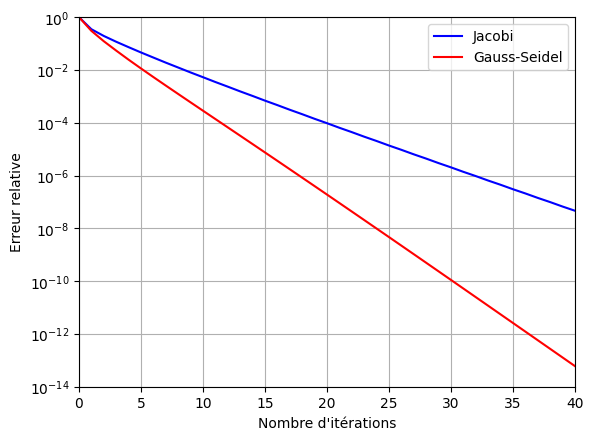

In [12]:
# Paramètres
nb_iter = 40
x_ref = np.linalg.solve(A, b)

# Splitting de Jacobi
B_J = np.diag(np.diag(A))
C_J = B_J - A
xk_J = [x0]
for _ in np.arange(0, nb_iter):
    xk_J.append(np.linalg.solve(B_J, C_J.dot(xk_J[-1]) + b))
err_rel_J = [np.linalg.norm(xk - x_ref) / np.linalg.norm(x0 - x_ref) for xk in xk_J]

# Splitting de Gauss-Seidel
B_GS = np.tril(A)
C_GS = B_GS - A
xk_GS = [x0]
for _ in np.arange(0, nb_iter):
    xk_GS.append(np.linalg.solve(B_GS, C_GS.dot(xk_GS[-1]) + b))
err_rel_GS = [np.linalg.norm(xk - x_ref) / np.linalg.norm(x0 - x_ref) for xk in xk_GS]

# Figure
it = np.arange(0, nb_iter+1)
fig = plt.figure()
# JACOBI
plt.semilogy(it , err_rel_J, color='blue', label='Jacobi')
# VOTRE TAUX DE CONVERGENCE ICI

# GAUSS-SEIDEL
plt.semilogy(it, err_rel_GS, color='red', label='Gauss-Seidel')
# VOTRE TAUX DE CONVERGENCE ICI
plt.legend()
plt.grid()
plt.xlim([0, 40])
plt.ylim([1e-14, 1e0])
plt.xlabel("Nombre d'itérations")
plt.ylabel("Erreur relative")
plt.show()



## Exercice 3: Méthode de Newton

### Exercice 3.1: Méthode de Newton scalaire

Soit $f : \mathbb R \rightarrow \mathbb R$ une fonction dérivable.

La méthode de Newton scalaire est un cas particulier de l'itération du point fixe, donnée par l'itération
$$x^{(k+1)} = x^{(k)} - \frac{f(x^{(k)})}{f'(x^{(k)})},$$
à partir d'une valeur initiale $x^{(0)}$. Cette itération va converger vers une racine de $f$. 

--- 

Implémentez la méthode de Newton scalaire dans une fonction `Newton_scalaire`.


In [13]:
def Newton_scalaire(f, df, x0, max_iter, tol):
    """Méthode de Newton scalaire.
    L'itération s'arrête lorsque le nombre maximal d'itérations est atteint,
    ou bien lorsque la différence entre deux itérations est plus petite que la tolérance donnée.

    Entrées
    -------
    f : callable
        Fonction du problème; y = f(x)
    df : callable
        Dérivée de f; z = df(x)
    x0 : float
        Valeur initiale
    max_iter : int
        Nombre maximal d'itérations
    tol : float
        Tolérance pour la convergence

    Sorties
    -------
    xk: list
        Liste des valeurs de x à chaque itération
    """
    # VOTRE CODE ICI
    xk = []
    xk.append(x0)
    x = x0
    for i in np.arange(max_iter):
        x = x - f(x)/df(x)
        xk.append(x)
        if (np.linalg.norm(x - 0) <= tol):
            return xk
    return xk

    

Testez votre fonction sur la fonction $f(x) = x^3 - x - 3$.

Tracez la courbe de la fonction $f$ sur l'intervalle $[1, 2]$ et les itérés de la méthode de Newton.

Vous pourrez utiliser les paramètres suivants:

    x0 = 1.5
    tol = 1e-8
    max_iter = 20

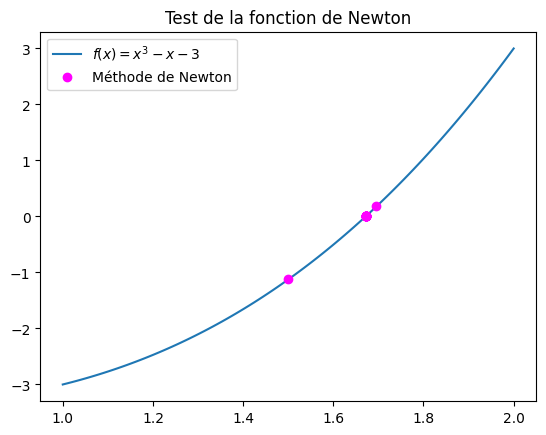

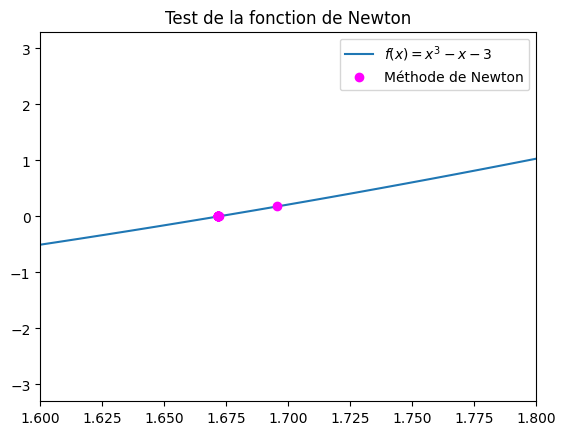

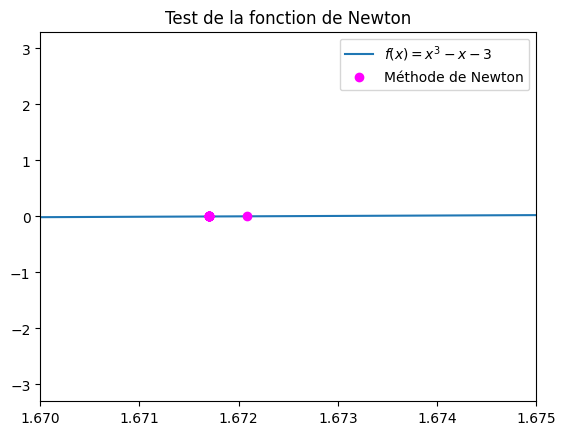

In [19]:
# VOTRE CODE ICI
x0 = 1.5
tol = 1e-8
max_iter = 20
f = lambda x: x**3 - x - 3
df = lambda x: 3*x**2-1
x_f = np.linspace(1, 2, 100)
y_f = []
for i in np.arange(len(x_f)):
    y_f.append(f(x_f[i]))
x_k = Newton_scalaire(f, df, x0, max_iter, tol)
y_k = []
for i in np.arange(len(x_k)):
    y_k.append(f(x_k[i]))
plt.plot(x_f, y_f, label='$f(x) = x^{3} - x - 3$')
plt.title("Test de la fonction de Newton")
plt.plot(x_k, y_k, 'o', color='magenta', label='Méthode de Newton')
plt.legend()
plt.show()

plt.plot(x_f, y_f, label='$f(x) = x^{3} - x - 3$')
plt.title("Test de la fonction de Newton")
plt.plot(x_k, y_k, 'o', color='magenta', label='Méthode de Newton')
plt.legend()
plt.xlim(1.6, 1.8)
plt.show()

plt.plot(x_f, y_f, label='$f(x) = x^{3} - x - 3$')
plt.title("Test de la fonction de Newton")
plt.plot(x_k, y_k, 'o', color='magenta', label='Méthode de Newton')
plt.legend()
plt.xlim(1.67, 1.675)
plt.show()





### Exercice 3.2: Méthode de Newton vectorielle

Soit $f : \mathbb R^n \rightarrow \mathbb R^n$ une fonction dérivable.

Sous la condition que $f'(\pmb{x}^{(k)})$ est inversible, la méthode de Newton est donnée par l'itération
$$\pmb{x}^{(k+1)} = \pmb{x}^{(k)} + \pmb{p}_k, \quad \text{ où } f'(\pmb{x}^{(k)}) \pmb{p}_k = - f(\pmb{x}^{(k)}).$$

Le code ci-dessous implémente la méthode de Newton vectorielle.


In [22]:
def Newton_vectoriel(f, df, x0, max_iter, tol):
    """Méthode de Newton vectoriel.
    L'itération s'arrête lorsque le nombre maximal d'itérations est atteint,
    ou bien lorsque la différence entre deux itérations est plus petite que la tolérance donnée.

    Entrées
    -------
    f : callable
        Fonction du problème; y = f(x)
    df : callable
        Dérivée de f; z = df(x)
    x0 : ndarray
        Valeur initiale
    max_iter : int
        Nombre maximal d'itérations
    tol : float
        Tolérance pour la convergence

    Sorties
    -------
    xk: list
        Liste des valeurs de x à chaque itération
    """
    # VOTRE CODE ICI
    xk = [x0]
    for k in np.arange(max_iter):
        x1 = xk[-1] - np.linalg.solve(df(xk[-1]), f(xk[-1]))
        xk.append(x1)
        if np.linalg.norm(x1 - xk[-2]) < tol:
            break
    return xk

Considérons la fonction complexe 
$$f: \mathbb C \rightarrow \mathbb C, \quad f(z) = z^3 - 1.$$

1. À la main, écrire cette fonction sous forme vectorielle, c'est-à-dire comme une fonction $g: \mathbb R^2 \rightarrow \mathbb R^2$. Calculez la jacobienne de $g$.
2. Appliquez la méthode de Newton vectorielle à cette fonction. Vous pourrez utiliser les paramètres suivants:
    * $x_0 = - 1 - 1i$
    * $tol = 1e-8$
    * $max\_iter = 20$
3. Tracez la courbe de l'erreur relative en fonction du nombre d'itérations. (Quelle est le zéro de $f$ le plus proche de $x_0$?)
4. (Optionnel) Essayez avec différentes valeurs de $x_0$. Converge-t-on toujours vers le zéro le plus proche de $x_0$?

*Dérivation de la fonction vectorielle et de sa jacobienne ici*

$$f(z) = f(x + iy) = (x + iy)^3 - 1 = (x^2 + 2xyi - y^2)(x + iy) -1 = x^3 + 2x^2yi-xy^2 + x^2iy - 2xy^2 -iy^3 = x^3 - 3xy^2 + i(3x^2y-y^3)$$
Soit on a:
$$g(x, y) = g_1(x, y) + ig_2(x, y)$$
$$g_1(x, y) = x^3 -3xy^2$$
$$g_2(x, y) = 3x^2 -y^3$$
Donc la jacobienne est:
$$J = \begin{pmatrix}
3x^2 - 3y^2 & -6xy \\
6x & -3y^2
\end{pmatrix}$$


In [23]:
# VOTRE CODE ICI
x0 = complex(-1, -1)
tol = 1e-8
max_iter = 20
g_1 = lambda x, y: x**3 - 3*x*y**2
g_2 = lambda x, y: 3 * x**2 - y ** 3
g = lambda x, y: complex(g_1(x, y), g_2(x, y))
dg = lambda x, y: np.array[[3*x**2 - 3 * y **2, -6*x*y], [complex(6*x), complex(-3*y**2)]]
Newton_vectoriel(g, dg, x0, max_iter, tol)


TypeError: <lambda>() missing 1 required positional argument: 'y'

### Exercice 3.3: Bassins d'attraction

Soit $\pmb{x}^*$ une racine de $f$. Le **bassin d'attraction** de $\pmb{x}^*$ est l'ensemble des valeurs initiales $x_0$ tels que la méthode de Newton converge vers $x^*$ à partir de $\pmb{x}_0$. En d'autres termes,
$$
\begin{aligned}
A_{\pmb{x}^*} &= \{\pmb{x}^{(0)} \in \mathbb R^n \mid \pmb{x}^{(k)} \text{ converge vers } \pmb{x}^* \} \\ 
&= \{ \pmb{x}^{(0)} \in \mathbb R^n \mid \forall \varepsilon > 0, \exists K \in \mathbb N,  (k \geq K \implies \| \pmb{x}^{(k)} - \pmb{x}^* \|_2 < \varepsilon) \}.
\end{aligned}$$

Contrairement à ce que l'on pourrait penser, ces ensembles sont loin d'être simple. Voyons par exemple le cas de la fonction de l'exercice précédent, c'est à dire $$f(z) = z^3 - 1.$$
Les racines de cette fonction sont $$z_1 = 1, \quad z_2 = - \frac{1}{2} + \frac{\sqrt{3}}{2} i, \quad z_3 = - \frac{1}{2} - \frac{\sqrt{3}}{2} i.$$
Concentrons-nous sur le carré unité dans le plan complexe. 

L'idée est la suivante:
- On discrétise le carré unité en une grille de $N \times N$ points.
- On se fixe une tolérance et un nombre maximal d'itérations, puis on applique la méthode de Newton à chaque point de la grille.
- On regarde vers quelle racine chaque point de la grille a convergé. 
  
Pour chaque point de la grille, on peut donc associer un nombre entier $1, 2, 3$ qui indique vers quelle racine il a convergé (ou $0$, si la méthode n'a pas convergée). On peut alors représenter le bassin d'attraction de chaque racine par une couleur différente avec la fonction `imshow` de `matplotlib`.

---

Écrire une fonction `RacineAssociee` qui prend en argument une valeur initiale $\pmb{x}_0$ et qui renvoie le nombre associé à la racine vers laquelle a convergé la méthode.

**Indications:** 
- Utilisez les fonctions définies dans l'exercice 3.2.
- Si vous n'avez pas réussi à implémenter la méthode de Newton vectorielle, vous pouvez utiliser la méthode de scipy `scipy.optimize.newton(g, x_0, dg)`, où `g` est la fonction vectorielle et `dg` sa jacobienne. Cette fonction renvoie la racine de `g` la plus proche de `x_0`.

In [ ]:
def RacineAssociee(x_0, max_iter, tol):
    """
    Retourne la catégorie de la racine associée à la valeur initiale x_0.

    Entrées
    -------
    x_0 : float
        Valeur initiale
    max_iter : int
        Nombre maximal d'itérations
    tol : float
        Tolérance pour la convergence

    Sorties
    -------
    numero : int
        Numéro de la catégorie de la racine associée
    """
    z1 = np.asarray([1, 0])
    z2 = np.asarray([-1/2, np.sqrt(3)/2])
    z3 = np.asarray([-1/2, -np.sqrt(3)/2])
    # VOTRE CODE ICI
    f = lambda z: complex(z)**3 -1

Complétez le code ci-dessous pour estimer numériquement les bassins d'attractions des trois racines. Vous pourrez utiliser les paramètres suivants:

    tol = 1e-8
    max_iter = 20
    N = 200

Tracez le résultat avec la fonction `imshow` de `matplotlib`.

Vous pouvez raffiner la grille en augmentant la valeur de `N`. (Cela prend environ 2 minutes pour $N=1000$.)

Qu'observez-vous? Commentez.

In [ ]:
# Discrétisation du carré [-1, 1] x [-1, 1]
N = 1000
grille = np.linspace(-1, 1, N)
X, Y = np.meshgrid(grille, grille)

# Calcul de la catégorie de chaque point de la grille : np.array([X[i, j], Y[i, j]])
# VOTRE CODE ICI


# Figure
fig = plt.figure()
# VOTRE CODE ICI
plt.xticks([-1, 0, 1])
plt.yticks([-1, 0, 1])
plt.colorbar(ticks = [0, 1, 2, 3])
plt.show()



*Votre observation ici*

